In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load your data (replace 'customer_data.csv' with your file)
try:
    df = pd.read_csv('/content/customer_data.csv')
except FileNotFoundError:
    print("Error: customer_data.csv not found. Please provide your data.")
    exit()

# Debugging: Inspect the DataFrame
print("Columns in the DataFrame:", df.columns)
print("First 5 rows of the DataFrame:\n", df.head())

Columns in the DataFrame: Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'Contract', 'PaymentMethod', 'OnlineSecurity',
       'TechSupport', 'churn'],
      dtype='object')
First 5 rows of the DataFrame:
    CustomerID  Gender  Age  Tenure  MonthlyCharges  TotalCharges  \
0           1    Male   35      24            65.0        1500.0   
1           2  Female   42       2            80.0         160.0   
2           3    Male   28      15            55.0         800.0   
3           4  Female   50      60           110.0        6600.0   
4           5    Male   22       5            30.0         150.0   

         Contract     PaymentMethod OnlineSecurity TechSupport churn  
0        One year      Mailed check            Yes          No    No  
1  Month-to-month  Electronic check             No          No   Yes  
2  Month-to-month     Bank transfer             No         Yes    No  
3        Two year       Credit card            Yes         

In [ ]:
# 2. Data Exploration and Preprocessing
# (Add more exploration and cleaning based on your data)

# Example: Handle missing values (imputation)
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
# Ensure 'churn' is not included in numerical or categorical features
if 'churn' in numerical_features:
    numerical_features.remove('churn')
if 'churn' in categorical_features:
    categorical_features.remove('churn')

numerical_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #impute before one hot encoding
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Separate features (X) and target (y)
X = df.drop('churn', axis=1)  # Assuming 'churn' is your target column
y = df['churn']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# 3. Model Training and Evaluation

# Logistic Regression
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_model.fit(X_train_processed, y_train)
logistic_predictions = logistic_model.predict(X_test_processed)

print("Logistic Regression:")
print(classification_report(y_test, logistic_predictions))
print(confusion_matrix(y_test, logistic_predictions))

Logistic Regression:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[3 0]
 [0 1]]


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)
rf_predictions = rf_model.predict(X_test_processed)

print("\nRandom Forest:")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))



Random Forest:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[3 0]
 [0 1]]


In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_processed, y_train)
gb_predictions = gb_model.predict(X_test_processed)

print("\nGradient Boosting:")
print(classification_report(y_test, gb_predictions))
print(confusion_matrix(y_test, gb_predictions))


Gradient Boosting:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[[3 0]
 [0 1]]


In [ ]:
# 4. Feature Importance (for Random Forest and Gradient Boosting)

if isinstance(rf_model, RandomForestClassifier) and hasattr(rf_model, 'feature_importances_'):
    feature_importance_rf = rf_model.feature_importances_
    feature_names_rf = preprocessor.get_feature_names_out()
    feature_importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importance_rf})
    feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)
    print("\nRandom Forest Feature Importance:")
    print(feature_importance_df_rf.head(10)) #display top 10

if isinstance(gb_model, GradientBoostingClassifier) and hasattr(gb_model, 'feature_importances_'):
    feature_importance_gb = gb_model.feature_importances_
    feature_names_gb = preprocessor.get_feature_names_out()
    feature_importance_df_gb = pd.DataFrame({'Feature': feature_names_gb, 'Importance': feature_importance_gb})
    feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)
    print("\nGradient Boosting Feature Importance:")
    print(feature_importance_df_gb.head(10)) #display top 10


Random Forest Feature Importance:
                             Feature  Importance
2                        num__Tenure    0.300610
4                  num__TotalCharges    0.152286
6                   cat__Gender_Male    0.092121
5                 cat__Gender_Female    0.070366
1                           num__Age    0.061485
7       cat__Contract_Month-to-month    0.057290
14            cat__OnlineSecurity_No    0.054211
10  cat__PaymentMethod_Bank transfer    0.054180
15           cat__OnlineSecurity_Yes    0.045286
3                num__MonthlyCharges    0.040506

Gradient Boosting Feature Importance:
                                Feature  Importance
2                           num__Tenure         1.0
0                       num__CustomerID         0.0
10     cat__PaymentMethod_Bank transfer         0.0
16                  cat__TechSupport_No         0.0
15              cat__OnlineSecurity_Yes         0.0
14               cat__OnlineSecurity_No         0.0
13      cat__PaymentMet

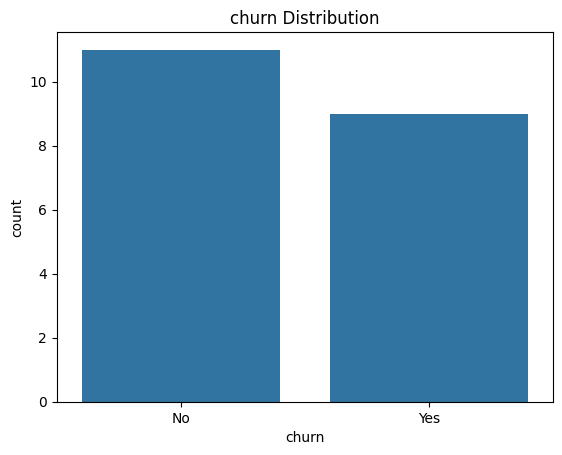

<ipython-input-20-5e5f6185f176>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['churn'] = numerical_df['churn'].map({'Yes': 1, 'No': 0})


CustomerID          int64
Age                 int64
Tenure              int64
MonthlyCharges    float64
TotalCharges      float64
churn               int64
dtype: object
   CustomerID  Age  Tenure  MonthlyCharges  TotalCharges  churn
0           1   35      24            65.0        1500.0      0
1           2   42       2            80.0         160.0      1
2           3   28      15            55.0         800.0      0
3           4   50      60           110.0        6600.0      0
4           5   22       5            30.0         150.0      1


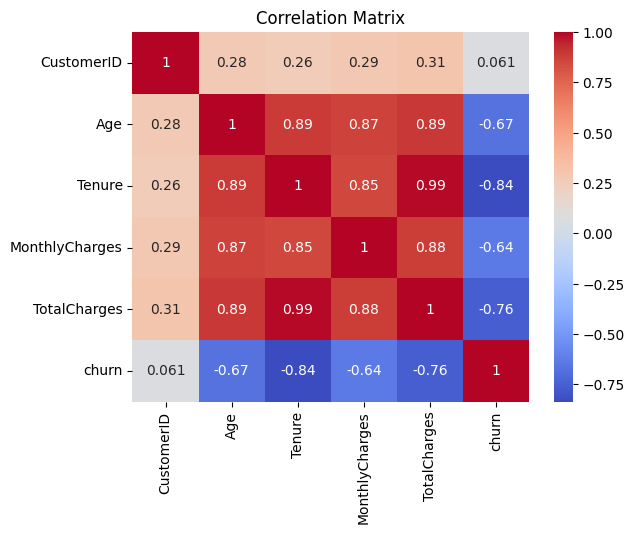

In [ ]:
# 5. Visualization (example)
# (Create more visualizations based on your data and analysis)
sns.countplot(x='churn', data=df)
plt.title('churn Distribution')
plt.show()

numerical_df = df[numerical_features + ['churn']]  # add churn column to numerical only dataframe

# Convert 'churn' to numeric (1/0) if needed
if numerical_df['churn'].dtype == 'object':
    numerical_df['churn'] = numerical_df['churn'].map({'Yes': 1, 'No': 0})

print(numerical_df.dtypes)
print(numerical_df.head())

numerical_df = numerical_df.apply(pd.to_numeric, errors='coerce')
numerical_df.fillna(numerical_df.mean(), inplace=True)

correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()